# Create sum_vec for nosleep and confessions

In [26]:
import pandas as pd
import numpy as np

nosleep2020 = pd.read_pickle('../pickles/nosleep2020.pickle')
confessions2020 = pd.read_pickle('../pickles/confessions2020.pickle')
nosleep_comments = pd.read_pickle('../pickles/nosleep_comments.pickle')
confessions_comments = pd.read_pickle('../pickles/confessions_comments.pickle')

from sentence_transformers import SentenceTransformer
model = SentenceTransformer('distilbert-base-nli-stsb-mean-tokens')

import spacy

spacy.prefer_gpu()
# Must return True for GPU to work

nlp = spacy.load('en_core_web_lg')

# need nlp and model
def sum_vec(text):
    doc = nlp(text)
    sentences = [sent.text for sent in doc.sents]
    comment_vec = model.encode(sentences)
    return np.sum(comment_vec, axis = 0)

from tqdm import tqdm, tqdm_pandas, tqdm_notebook
tqdm.pandas()

nosleep2020.loc[:,'sum_vec'] = nosleep2020.progress_apply(lambda x: sum_vec(x['selftext']), axis=1)
nosleep2020.to_pickle('../pickles/new/creepy(nosleep2020).pickle')

confessions2020.loc[:,'sum_vec'] = confessions2020.progress_apply(lambda x: sum_vec(x['selftext']), axis=1)
confessions2020.to_pickle('../pickles/new/non-creepy(confessions2020).pickle')

# Create log for nosleep and confessions

Start from here. No need to run previous cells again.

## Creepy

In [57]:
import pandas as pd
creepy = pd.read_pickle('../pickles/new/creepy(nosleep2020.score>0).pickle')
noncreepy = pd.read_pickle('../pickles/new/non-creepy(confessions2020.score>0).pickle')

In [58]:
creepy_w_idx = creepy.reset_index(drop = True).reset_index()
noncreepy_w_idx = noncreepy.reset_index(drop = True).reset_index()

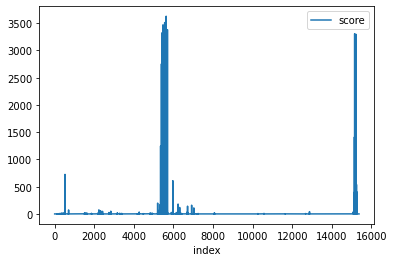

In [59]:
import matplotlib.pyplot as plt
import numpy as np

creepy_w_idx.plot(x = 'index', y = 'score')
plt.show()

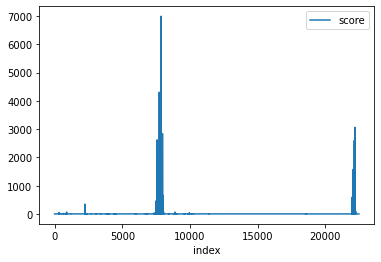

In [60]:
noncreepy_w_idx.plot(x = 'index', y = 'score')
plt.show()

In [71]:
creepy_w_idx_score_numpy = creepy_w_idx['score'].to_numpy()
min_score = np.amin(creepy_w_idx_score_numpy)

creepy_w_idx['log_(score+min+0.01)'] = np.ma.log(creepy_w_idx_score_numpy+min_score+0.01).filled(np.nan)
creepy_w_idx

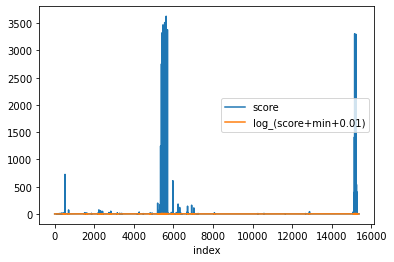

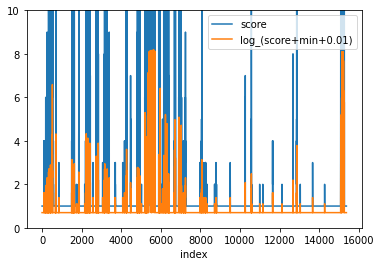

In [63]:
creepy_w_idx.plot(x = 'index', y = ['score', 'log_(score+min+0.01)'])
plt.show()

creepy_w_idx.plot(x = 'index', y = ['score', 'log_(score+min+0.01)'])
plt.ylim([0,10])
plt.show()

In [66]:
def prepend(x):
    return np.insert(x['sum_vec'], 0, x['log_(score+min+0.01)'], axis = 0)

In [67]:
creepy_w_idx['sum_vec_with_log_prepended'] = creepy_w_idx.apply(prepend, axis = 1)

In [70]:
creepy_w_idx.to_pickle('../pickles/new/creepy_with_log.pickle')

## Non Creepy

In [72]:
noncreepy_w_idx_score_numpy = noncreepy_w_idx['score'].to_numpy()
min_score = np.amin(noncreepy_w_idx_score_numpy)

noncreepy_w_idx['log_(score+min+0.01)'] = np.ma.log(noncreepy_w_idx_score_numpy+min_score+0.01).filled(np.nan)
noncreepy_w_idx

,index,id,title,selftext,score,sum_vec,log_(score+min+0.01)
0,0,gxs5ks,100% of blacks are criminals.,When you're a vast minority and still commit *...,1,"[0.7044204, -0.35632572, -2.2368622, -2.785619...",0.698135
1,1,gxrzxh,I tell girls I’m a virgin,"So when I do have sex, there is no pressure or...",1,"[-2.0128734, -0.068635136, 0.87876815, -0.5470...",0.698135
2,2,gxrvrz,Should I rape her?,I'm thinking of raping a woman I know but I'm ...,1,"[0.41544214, -3.7573016, 3.4196904, -2.4164433...",0.698135
3,3,gxro4y,"Whenever I hear something about Steve Jobs, I ...",Oh and I find my sister sexually attractive*\n...,1,"[-0.46506143, -1.333375, 0.8905803, 0.24066955...",0.698135
4,4,gxrepo,U WHITE BOYS BE FUCKING UP SO NOW U GINA GET R...,YALL WHITE BOYS BE ACTING OUT LIKE FAGGOTS AND...,1,"[-2.895782, 2.1338491, 5.2024875, -7.1046414, ...",0.698135
...,...,...,...,...,...,...,...
22469,22469,eig2se,I fucked my wife in a stairwell at a New Years...,"So not sure who I can tell this in real life, ...",1,"[-2.0715501, -5.330159, 12.31006, -16.401604, ...",0.698135
22470,22470,eig28i,I can finally see!!,Guys I don’t know what happened but suddenly I...,1,"[-0.45912927, 0.057422668, 0.68606466, -0.4874...",0.698135
22471,22471,eig0jd,"My mom died when I was 15, I'm now 31. I live ...",But it has fully readjusted my oulook on life....,1,"[-0.78924334, 0.29064384, 4.8567257, -4.945154...",0.698135
22472,22472,eifz18,Miscarriage..,I can hear everyone around me bringing in the ...,1,"[2.086616, -1.4328195, 4.546623, -3.63208, -3....",0.698135


In [73]:
noncreepy_w_idx['sum_vec_with_log_prepended'] = noncreepy_w_idx.apply(prepend, axis = 1)

In [74]:
noncreepy_w_idx

,index,id,title,selftext,score,sum_vec,log_(score+min+0.01),sum_vec_with_log_prepended
0,0,gxs5ks,100% of blacks are criminals.,When you're a vast minority and still commit *...,1,"[0.7044204, -0.35632572, -2.2368622, -2.785619...",0.698135,"[0.6981347, 0.7044204, -0.35632572, -2.2368622..."
1,1,gxrzxh,I tell girls I’m a virgin,"So when I do have sex, there is no pressure or...",1,"[-2.0128734, -0.068635136, 0.87876815, -0.5470...",0.698135,"[0.6981347, -2.0128734, -0.068635136, 0.878768..."
2,2,gxrvrz,Should I rape her?,I'm thinking of raping a woman I know but I'm ...,1,"[0.41544214, -3.7573016, 3.4196904, -2.4164433...",0.698135,"[0.6981347, 0.41544214, -3.7573016, 3.4196904,..."
3,3,gxro4y,"Whenever I hear something about Steve Jobs, I ...",Oh and I find my sister sexually attractive*\n...,1,"[-0.46506143, -1.333375, 0.8905803, 0.24066955...",0.698135,"[0.6981347, -0.46506143, -1.333375, 0.8905803,..."
4,4,gxrepo,U WHITE BOYS BE FUCKING UP SO NOW U GINA GET R...,YALL WHITE BOYS BE ACTING OUT LIKE FAGGOTS AND...,1,"[-2.895782, 2.1338491, 5.2024875, -7.1046414, ...",0.698135,"[0.6981347, -2.895782, 2.1338491, 5.2024875, -..."
...,...,...,...,...,...,...,...,...
22469,22469,eig2se,I fucked my wife in a stairwell at a New Years...,"So not sure who I can tell this in real life, ...",1,"[-2.0715501, -5.330159, 12.31006, -16.401604, ...",0.698135,"[0.6981347, -2.0715501, -5.330159, 12.31006, -..."
22470,22470,eig28i,I can finally see!!,Guys I don’t know what happened but suddenly I...,1,"[-0.45912927, 0.057422668, 0.68606466, -0.4874...",0.698135,"[0.6981347, -0.45912927, 0.057422668, 0.686064..."
22471,22471,eig0jd,"My mom died when I was 15, I'm now 31. I live ...",But it has fully readjusted my oulook on life....,1,"[-0.78924334, 0.29064384, 4.8567257, -4.945154...",0.698135,"[0.6981347, -0.78924334, 0.29064384, 4.8567257..."
22472,22472,eifz18,Miscarriage..,I can hear everyone around me bringing in the ...,1,"[2.086616, -1.4328195, 4.546623, -3.63208, -3....",0.698135,"[0.6981347, 2.086616, -1.4328195, 4.546623, -3..."


In [76]:
noncreepy_w_idx.to_pickle('../pickles/new/non-creepy_with_log.pickle')

Additional processing

In [3]:
import pandas as pd
import numpy as np

In [4]:
creepy = pd.read_pickle('../pickles/new/creepy_with_log.pickle')
noncreepy = pd.read_pickle('../pickles/new/non-creepy_with_log.pickle')

In [5]:
creepy_sum_vec_with_log_prepended = creepy.loc[:,'sum_vec_with_log_prepended'].copy()
noncreepy_sum_vec_with_log_prepended = noncreepy.loc[:,'sum_vec_with_log_prepended'].copy()

In [6]:
import spacy
spacy.prefer_gpu()

True

In [17]:
nlp = spacy.load("en_core_web_lg")
def count_sents(text):
    doc = nlp(text)
    return sum(1 for _ in doc.sents) # return how many sentences

def prepend(x):
    return np.insert(x['sum_vec']/x['selftext_sents_count'], 0, x['log_(score+min+0.01)'], axis = 0)

In [8]:
from tqdm import tqdm, tqdm_pandas, tqdm_notebook
tqdm.pandas()
creepy.loc[:,'selftext_sents_count'] = creepy.progress_apply(lambda x: count_sents(x['selftext']), axis=1)

/home/anthony/Documents/Research-Mapping-Uncanny-Valley/.venv/creepyvenv/lib/python3.8/site-packages/tqdm/std.py:697: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel
100%|██████████| 15372/15372 [22:11<00:00, 11.54it/s]


In [12]:
noncreepy.loc[:,'selftext_sents_count'] = noncreepy.progress_apply(lambda x: count_sents(x['selftext']), axis=1)

100%|██████████| 22474/22474 [06:44<00:00, 55.53it/s]


In [22]:
creepy.to_pickle('../creepy.pickle')

In [23]:
noncreepy.to_pickle('../noncreepy.pickle')

In [16]:
np.array([1,2,3,4])/3

array([0.33333333, 0.66666667, 1.        , 1.33333333])

In [18]:
creepy.loc[:,'vec'] = creepy.progress_apply(prepend, axis=1)

100%|██████████| 15372/15372 [00:00<00:00, 33071.28it/s]


In [20]:
noncreepy.loc[:,'vec'] = noncreepy.progress_apply(prepend, axis=1)

100%|██████████| 22474/22474 [00:00<00:00, 31998.21it/s]


In [21]:
noncreepy

,index,id,title,selftext,score,sum_vec,log_(score+min+0.01),sum_vec_with_log_prepended,selftext_sents_count,vec
0,0,gxs5ks,100% of blacks are criminals.,When you're a vast minority and still commit *...,1,"[0.7044204, -0.35632572, -2.2368622, -2.785619...",0.698135,"[0.6981347, 0.7044204, -0.35632572, -2.2368622...",12,"[0.6981347, 0.058701698, -0.02969381, -0.18640..."
1,1,gxrzxh,I tell girls I’m a virgin,"So when I do have sex, there is no pressure or...",1,"[-2.0128734, -0.068635136, 0.87876815, -0.5470...",0.698135,"[0.6981347, -2.0128734, -0.068635136, 0.878768...",4,"[0.6981347, -0.50321835, -0.017158784, 0.21969..."
2,2,gxrvrz,Should I rape her?,I'm thinking of raping a woman I know but I'm ...,1,"[0.41544214, -3.7573016, 3.4196904, -2.4164433...",0.698135,"[0.6981347, 0.41544214, -3.7573016, 3.4196904,...",13,"[0.6981347, 0.031957086, -0.2890232, 0.2630531..."
3,3,gxro4y,"Whenever I hear something about Steve Jobs, I ...",Oh and I find my sister sexually attractive*\n...,1,"[-0.46506143, -1.333375, 0.8905803, 0.24066955...",0.698135,"[0.6981347, -0.46506143, -1.333375, 0.8905803,...",4,"[0.6981347, -0.11626536, -0.33334374, 0.222645..."
4,4,gxrepo,U WHITE BOYS BE FUCKING UP SO NOW U GINA GET R...,YALL WHITE BOYS BE ACTING OUT LIKE FAGGOTS AND...,1,"[-2.895782, 2.1338491, 5.2024875, -7.1046414, ...",0.698135,"[0.6981347, -2.895782, 2.1338491, 5.2024875, -...",16,"[0.6981347, -0.18098637, 0.13336557, 0.3251554..."
...,...,...,...,...,...,...,...,...,...,...
22469,22469,eig2se,I fucked my wife in a stairwell at a New Years...,"So not sure who I can tell this in real life, ...",1,"[-2.0715501, -5.330159, 12.31006, -16.401604, ...",0.698135,"[0.6981347, -2.0715501, -5.330159, 12.31006, -...",53,"[0.6981347, -0.03908585, -0.10056904, 0.232265..."
22470,22470,eig28i,I can finally see!!,Guys I don’t know what happened but suddenly I...,1,"[-0.45912927, 0.057422668, 0.68606466, -0.4874...",0.698135,"[0.6981347, -0.45912927, 0.057422668, 0.686064...",2,"[0.6981347, -0.22956464, 0.028711334, 0.343032..."
22471,22471,eig0jd,"My mom died when I was 15, I'm now 31. I live ...",But it has fully readjusted my oulook on life....,1,"[-0.78924334, 0.29064384, 4.8567257, -4.945154...",0.698135,"[0.6981347, -0.78924334, 0.29064384, 4.8567257...",13,"[0.6981347, -0.060711026, 0.022357218, 0.37359..."
22472,22472,eifz18,Miscarriage..,I can hear everyone around me bringing in the ...,1,"[2.086616, -1.4328195, 4.546623, -3.63208, -3....",0.698135,"[0.6981347, 2.086616, -1.4328195, 4.546623, -3...",14,"[0.6981347, 0.149044, -0.10234425, 0.3247588, ..."
